In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import glob

In [2]:
img_dir     = "/home/turgay/falling_objects_dataset/img_files"  
csv_dir     = "/home/turgay/falling_objects_dataset/csv_files"

In [3]:
dirs_image = sorted(os.listdir(img_dir))


In [4]:
dirs_image[:3]

['0.png', '1.png', '10.png']

In [2]:
def read_and_append_images(data_path, output_file, batch_size=100, image_size=(224, 224)):
 

    image_files  =   glob.glob(os.path.join(data_path, "*.png"))  
    total_images =   len(image_files)

    for i in range(0, total_images, batch_size):
        
        batch_images = []
        
        for img_path in image_files[i:i + batch_size]:
            img = Image.open(img_path)
            img = img.resize(image_size)  # Resize to (224, 224)
            img = np.array(img)           # Convert to numpy array
            if img.shape != (image_size[0], image_size[1], 3):  # Ensure correct shape
                continue
            batch_images.append(img)
        
        batch_images = np.array(batch_images)  # Convert list of images to numpy array

        # Append to the .npy file
        if os.path.exists(output_file):
            with open(output_file, 'ab') as f:  # Open in append binary mode
                np.save(f, data_to_append)
        else:
            # If the file does not exist, create it and save the data
            with open(output_file, 'wb') as f:  # Open in write binary mode
                np.save(f, data_to_append)

        print(f"Processed and appended batch {i // batch_size + 1} of {total_images // batch_size + 1}.")


In [7]:
output_file = "tower_blocks_images.npy" 

In [8]:
read_and_append_images(img_dir, output_file, batch_size=1000)

Processed and appended batch 1 of 501.
Processed and appended batch 2 of 501.
Processed and appended batch 3 of 501.
Processed and appended batch 4 of 501.
Processed and appended batch 5 of 501.
Processed and appended batch 6 of 501.
Processed and appended batch 7 of 501.
Processed and appended batch 8 of 501.
Processed and appended batch 9 of 501.
Processed and appended batch 10 of 501.
Processed and appended batch 11 of 501.
Processed and appended batch 12 of 501.
Processed and appended batch 13 of 501.
Processed and appended batch 14 of 501.
Processed and appended batch 15 of 501.
Processed and appended batch 16 of 501.
Processed and appended batch 17 of 501.
Processed and appended batch 18 of 501.
Processed and appended batch 19 of 501.
Processed and appended batch 20 of 501.
Processed and appended batch 21 of 501.
Processed and appended batch 22 of 501.
Processed and appended batch 23 of 501.
Processed and appended batch 24 of 501.
Processed and appended batch 25 of 501.
Processed

In [11]:
path = "/home/turgay/Turgay/Academic/2024-2025/Fall/Generative_Models/Final_Project/Data/" 

In [12]:
data = np.load(path + "tower_blocks_images.npy")

In [13]:
data.shape

(1000, 224, 224, 3)

In [18]:
def plot_img(data, row, col, size1, size2, c_map = None): 
    if (row == 1) and (col == 1): 
        fig, ax = plt.subplots(1, 1, figsize=(size1, size2))
        ax.imshow(data, cmap=c_map) 
        ax.set_axis_off() 

    elif (row == 1) and (col > 1):
        fig, axes = plt.subplots(1, col, figsize=(size1, size2))
        for i in range(col):
            axes[i].imshow(data[i], cmap=c_map) 
            axes[i].set_axis_off() 
            axes[i].set_title(f"Image {i}")

    else:
        fig, axes = plt.subplots(row, col, figsize=(size1, size2))
        axes = axes.flatten()  # Flatten the axes to make indexing easier
        for i in range(row * col):
            if i < len(data):  # Ensure you do not exceed the length of data
                axes[i].imshow(data[i], cmap=c_map) 
                axes[i].set_axis_off()  
                axes[i].set_title(f"Image {i}")
            else:
                axes[i].axis('off')  # Turn off unused axes

    plt.tight_layout()  
    plt.show()


In [19]:
data.shape

(1000, 224, 224, 3)

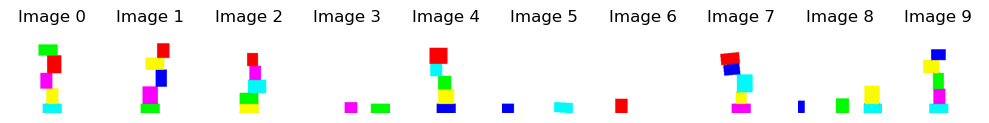

In [20]:
plot_img(data[:10, :, :, :] , 1, 10, 10, 10)